In [2]:
import pandas as pd

In [108]:
# 读取数据
data = pd.read_excel("./引下线.xlsx",header=None,skiprows=1)

In [109]:
data.shape

(100000, 12)

In [110]:
data.head()

0      1      2     3       4       5      6       7    8      9   \
0  大连地区  32.94  64.05  0.15  461.95  294.22  67.95  199.22  0.0  22.12   
1  大连地区  22.32  45.35  0.09  410.70  283.53  66.65  151.33  0.0  11.10   
2  大连地区  34.11  70.81  0.13  452.81  293.55  68.42  194.73  0.0  23.81   
3  大连地区  30.31  69.94  0.15  450.31  294.60  68.31  193.15  0.0  21.80   
4  大连地区  12.95  12.36  0.04  320.80  271.85  64.34  119.39  0.0   2.46   

       10 11  
0  116.89  E  
1   21.89  C  
2   86.11  E  
3   48.36  E  
4    2.52  A

In [111]:
data.describe()

1              2              3              4   \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       33.579207      34.283242       0.041847     545.547095   
std        22.649233      20.601057       0.058397      98.531688   
min         4.680000       3.000000       0.000000     311.230000   
25%        14.070000      15.127500       0.000000     476.670000   
50%        28.990000      32.950000       0.000000     556.760000   
75%        47.270000      50.652500       0.090000     626.512500   
max       103.160000      87.500000       0.190000     709.990000   

                  5              6              7              8   \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      285.827918      63.898058     168.822658      11.280837   
std        11.855188      18.502231      33.465007      13.354233   
min       256.150000      26.000000     110.000000       0.000000   
25%       276.490000      49.630000     139.647500       0.000000   
50%       287.110000      65.970000     170.060000       2.500000   
75%       295.590000      77.240000     199.570000      22.580000   
max       307.150000      95.000000     220.000000      40.000000   

                  9              10  
count  100000.000000  100000.000000  
mean       15.064276     126.213140  
std         8.665014     204.918406  
min         0.000000       0.000000  
25%         7.600000       8.510000  
50%        15.115000      31.320000  
75%        22.570000     148.152500  
max        30.000000     859.990000

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  object 
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  object 
dtypes: float64(10), object(2)
memory usage: 9.2+ MB


通过对数据的初步观察发现，  
1、数据共含有11个特征，其中有一个特征为离散型特征，其余为连续型特征。最后一列为标签，共有六个类别。需要将第一列的字符型特征进行one-hot编码,便于模型的输入。  
2、数据中未存在缺失值的情况，因此不需要进行缺失值的处理。  

In [113]:
# 选取特征和标签
labels = data.iloc[:,-1]
data = data.iloc[:,:-1]

In [114]:
data.head()

0      1      2     3       4       5      6       7    8      9       10
0  大连地区  32.94  64.05  0.15  461.95  294.22  67.95  199.22  0.0  22.12  116.89
1  大连地区  22.32  45.35  0.09  410.70  283.53  66.65  151.33  0.0  11.10   21.89
2  大连地区  34.11  70.81  0.13  452.81  293.55  68.42  194.73  0.0  23.81   86.11
3  大连地区  30.31  69.94  0.15  450.31  294.60  68.31  193.15  0.0  21.80   48.36
4  大连地区  12.95  12.36  0.04  320.80  271.85  64.34  119.39  0.0   2.46    2.52

In [116]:
labels.value_counts()

C    16809
E    16741
F    16683
A    16677
D    16626
B    16464
Name: 11, dtype: int64

对标签值观察后得出  
共分为六类，分别为：A B C D E F  
每一类的类别数量相对平衡  
为了不破坏数据的平衡性，采用对每类样本随机抽样的方法进行实验，随机抽取每类样本的80%作为训练集，20%作为测试集。  
在训练之前首先需要对标签值进行 onehot 编码，将标签值转换为向量形式，便于模型的训练。


In [117]:
# 对第一列的字符型数据进行one-hot编码
onehot = pd.get_dummies(data,columns=[0])
dataset = pd.concat([onehot.iloc[:,-5:],onehot.iloc[:,:-5]],axis=1,ignore_index=True)

In [118]:
dataset.shape

(100000, 15)

In [119]:
dataset.head()

0   1   2   3   4      5      6     7       8       9      10      11   12  \
0   0   1   0   0   0  32.94  64.05  0.15  461.95  294.22  67.95  199.22  0.0   
1   0   1   0   0   0  22.32  45.35  0.09  410.70  283.53  66.65  151.33  0.0   
2   0   1   0   0   0  34.11  70.81  0.13  452.81  293.55  68.42  194.73  0.0   
3   0   1   0   0   0  30.31  69.94  0.15  450.31  294.60  68.31  193.15  0.0   
4   0   1   0   0   0  12.95  12.36  0.04  320.80  271.85  64.34  119.39  0.0   

      13      14  
0  22.12  116.89  
1  11.10   21.89  
2  23.81   86.11  
3  21.80   48.36  
4   2.46    2.52

In [124]:
# 划分数据集 将前80%作为训练集，后20%作为测试集
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset,labels,test_size=0.2,random_state=0)

In [125]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(80000, 15) (20000, 15) (80000,) (20000,)


In [126]:
# 归一化 对数值型数据进行归一化处理
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = np.concatenate([X_train.iloc[:,:5].values,sc.fit_transform(X_train.iloc[:,5:].values)],axis=1)
X_test = np.concatenate([X_test.iloc[:,:5].values,sc.fit_transform(X_test.iloc[:,5:].values)],axis=1)
# X_train = sc.fit_transform(X_train.values)
# X_test = sc.fit_transform(X_test.values)


In [127]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(80000, 15) (20000, 15) (80000,) (20000,)


In [128]:
# 对标签进行one-hot编码
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(y_train.values.reshape(-1,1))
y_test = one_hot_encoder.fit_transform(y_test.values.reshape(-1,1))
class_name = one_hot_encoder.categories_[0]
print(class_name)

['A' 'B' 'C' 'D' 'E' 'F']


采用 MLP 进行分类任务 采用交叉熵损失函数 采用AdamW优化器 采用dropout防止过拟合  
MLP 定义：feature_num, d_model,num_classes,dropout  
    输入：batchsize,feature_num  
    输出：batchsize,num_class  
feature_num：输入特征个数 15 ：5(字符型onehot)+ 10(数值型变量)  
d_model：模型维度 128  
num_classes：类别个数 6  
dropout：dropout概率 0.1, 防止模型过拟合
batchsize：批次大小 32

In [129]:
# 定义数据加载
from torch.utils.data import DataLoader
class Dataset(object):
    def __init__(self,dataset,labels):
        self.dataset = dataset
        self.labels = labels

    def __len__(self):
        return self.dataset.shape[0]
    
    def __getitem__(self, index):
        return self.dataset[index],self.labels[index]
train_dataset = Dataset(X_train,y_train)
test_dataset = Dataset(X_test,y_test)
train = DataLoader(train_dataset,batch_size=32,shuffle=True)
test = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [130]:
# 定义MLP模型
import torch.nn as nn
class MLP(nn.Module):
    # define model elements
    def __init__(self,feature_num, d_model,num_classes,dropout):
        super(MLP, self).__init__()

        self.hidden1 = nn.Linear(feature_num, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.hidden2 = nn.Linear(d_model, d_model//2,bias=True)
        self.norm2 = nn.LayerNorm(d_model//2)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.hidden3 = nn.Linear(d_model//2, num_classes,bias=True)

        self.apply(self._init_weight_)

    def _init_weight_(self,m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_uniform_(m.weight,mode='fan_in', nonlinearity='leaky_relu')
            if m.bias is not None:
                nn.init.constant_(m.bias,0)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.norm1(X)
        X = self.act1(X)
        if self.training:
            X = self.dropout1(X)

        X = self.hidden2(X)
        X = self.norm2(X)
        X = self.act2(X)
        if self.training:
            X = self.dropout2(X)

        X = self.hidden3(X)

        return X
    

In [134]:
import torch
import os
# 定义模型
model = MLP(15, 128, 6, 0.1) # feature_num, d_model, num_classes, dropout
lr = 1e-3 # learning rate
num_epochs = 20 # epoch
loss = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, betas=(0.9, 0.999), weight_decay=1e-2,eps=1e-8)
save_check = "checkpoints/"
if not os.path.exists(save_check):
    os.mkdir(save_check)

In [135]:
# 训练模型
from sklearn.metrics import f1_score

model.train()
best = 0
for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    labels = []
    preds = []
    for X,y in train:
        y_pred = model(X.float())
        l = loss(y_pred,y.argmax(dim=1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y.argmax(dim=1)).sum().item()
        labels.extend(y.argmax(dim=1).tolist())
        preds.extend(y_pred.argmax(dim=1).tolist())
    f1 = f1_score(labels,preds,average='macro')
    print("epoch: %d, train loss: %.4f, train acc: %.4f, f1:%.4f" % (epoch + 1, train_loss / len(train), train_acc / len(train_dataset),f1))
    if f1 > best: # 保存最好的模型
        best = f1
        torch.save(model.state_dict(), save_check + "model.pth")

epoch: 1, train loss: 0.1050, train acc: 0.9698, f1:0.9697
epoch: 2, train loss: 0.0068, train acc: 0.9983, f1:0.9983
epoch: 3, train loss: 0.0037, train acc: 0.9989, f1:0.9989
epoch: 4, train loss: 0.0019, train acc: 0.9994, f1:0.9994
epoch: 5, train loss: 0.0014, train acc: 0.9996, f1:0.9996
epoch: 6, train loss: 0.0021, train acc: 0.9995, f1:0.9995
epoch: 7, train loss: 0.0013, train acc: 0.9996, f1:0.9996
epoch: 8, train loss: 0.0009, train acc: 0.9998, f1:0.9998
epoch: 9, train loss: 0.0008, train acc: 0.9997, f1:0.9997
epoch: 10, train loss: 0.0008, train acc: 0.9997, f1:0.9997
epoch: 11, train loss: 0.0006, train acc: 0.9998, f1:0.9998
epoch: 12, train loss: 0.0011, train acc: 0.9996, f1:0.9996
epoch: 13, train loss: 0.0006, train acc: 0.9998, f1:0.9998
epoch: 14, train loss: 0.0009, train acc: 0.9997, f1:0.9997
epoch: 15, train loss: 0.0007, train acc: 0.9998, f1:0.9998
epoch: 16, train loss: 0.0012, train acc: 0.9997, f1:0.9997
epoch: 17, train loss: 0.0008, train acc: 0.9997,

模型在经过11个epoch后，损失不再下降，训练集上的准确率为0.99

测试报告：
              precision    recall  f1-score   support

           A  1.00000000 1.00000000 1.00000000      3398
           B  1.00000000 1.00000000 1.00000000      3254
           C  1.00000000 0.99940494 0.99970238      3361
           D  0.99940012 1.00000000 0.99969997      3332
           E  1.00000000 1.00000000 1.00000000      3352
           F  1.00000000 1.00000000 1.00000000      3303

    accuracy                      0.99990000     20000
   macro avg  0.99990002 0.99990082 0.99990039     20000
weighted avg  0.99990006 0.99990000 0.99990000     20000

混淆矩阵：


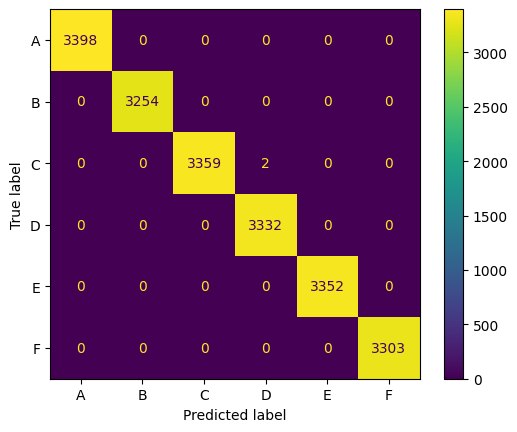

各个类别的误报率 :  [0.0, 0.0, 0.00012018508503094766, 0.0, 0.0, 0.0]


In [143]:
# 测试模型
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score

model.load_state_dict(torch.load(save_check + "model.pth"))
model.eval()
test_loss = 0
test_acc = 0
labels = []
preds = []
for X,y in test:
    y_pred = model(X.float())
    preds.extend(y_pred.argmax(dim=1).tolist())
    labels.extend(y.argmax(dim=1).tolist())
report = classification_report(labels, preds,target_names=[c for c in class_name],digits=8)
print("测试报告：")
print(report)

print("混淆矩阵：")
cm = confusion_matrix(y_true=labels, y_pred=preds, labels=[i for i in range(len(class_name))])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[c for c in class_name])
disp.plot()
plt.show()

def false_positive_rate(y_real,y_pred):
    cm = confusion_matrix(y_true=y_real, y_pred=y_pred)
    fpr = []
    for class_index in range(cm.shape[0]):
        fp = sum(cm[:, class_index]) - cm[class_index, class_index]
        tn = np.sum(cm) - np.sum(cm[class_index, :]) - np.sum(cm[:, class_index]) + cm[class_index, class_index]
        fpr.append(fp / (fp + tn))
    return fpr
fpr = false_positive_rate(preds,labels)
print("各个类别的误报率 : ",fpr)
